In [1]:
suppressMessages(library(data.table))
suppressMessages(library(ggplot2))
suppressMessages(library(ggsci))
suppressMessages(library(magrittr))
suppressMessages(library(ggrepel))
suppressMessages(library(ggalluvial))
suppressMessages(library(dplyr))
suppressMessages(library(ggpubr))
suppressMessages(library(valr))
suppressMessages(library(ggiraphExtra))
options(warn=-1) # use options(warn=0) To turn warnings back on
options(dplyr.summarise.inform = FALSE)
source("../src/plot_iso_structure.r")

colors = c("DNA"="#005F6499",
           "DNA/Crypton"="#00747D99",
           "DNA/Crypton-A"="#00838E99",
           "DNA/hAT"="#008D9B99",
           "DNA/hAT-Ac"="#0097A699",
           "DNA/hAT-Blackjack"="#00A1B399",
           "DNA/hAT-Charlie"="#00ACC099",
           "DNA/hAT-Tag1"="#00B4CC99",
           "DNA/hAT-Tip100"="#00BBD399",
           "DNA/hAT-Tip100?"="#13C1D799",
           "DNA/Kolobok"="#26C5D999",
           "DNA/Merlin"="#37CADD99",
           "DNA/MULE-MuDR"="#4CD0E099",
           "DNA/PIF-Harbinger"="#65D6E599",
           "DNA/PiggyBac"="#7FDEEA99",
           "DNA/TcMar-Mariner"="#99E4EE99",
           "DNA/TcMar-Tc1"="#B2EBF299",
           "DNA/TcMar-Tc2"="#C9F1F599",
           "DNA/TcMar-Tigger"="#DFF7F999",
           "LINE/CR1"="#311A9299",
           "LINE/Dong-R4"="#4828A299",
           "LINE/I-Jockey"="#5832AD99",
           "LINE/L1"="#6437B599",
           "LINE/L1-Tx1"="#815BC399",
           "LINE/L2"="#A185D299",
           "LINE/RTE-BovB"="#C8B9E599",
           "LINE/RTE-X"="#ECE6F699",
           "LTR"="#B71B1B99",
           "LTR/ERV1"="#D02D2D99",
           "LTR/ERVK"="#EF3E3399",
           "LTR/ERVL"="#E95E5D99",
           "LTR/ERVL-MaLR"="#F2A3A499",
           "LTR/Gypsy"="#FFEBED99",
           "no_repeat"="grey",
           "others"="grey45",
           "RC/Helitron"="#E5D8BD",
           "Retroposon/SVA"="orange",
           "rRNA"="#FDDAEC",
           "Satellite"="#FDCDAC",
           "Satellite/centr"="#FFFF99",
           "Satellite/subtelo"="#CCCCCC",
           "scRNA"="#666666",
           "SINE/5S-Deu-L2"="#1A5E1F99",
           "SINE/Alu"="#358A3999",
           "SINE/MIR"="#46A94B99",
           "SINE/tRNA"="#70BF7499",
           "SINE/tRNA-Deu"="#ACD9AE99",
           "SINE/tRNA-RTE"="#E7F4E999",
           "snRNA"="#FF7F00",
           "srpRNA"="#FBB4AE",
           "tRNA"="#FED9A6",
           "Unknown"="#E6AB02")

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/Figures")

In [3]:
#load data
load("../data/data_Fig03.RData")
load("../data/data_Fig02extra.RData")

In [4]:
# head(rmout_ex2000) # including upstream and downstream genome

In [5]:
# head(rmout) # only repetitive elements inserted in sequence of isoforms

In [6]:
# head(odds_df) # enrichment of repetitive elements in scaled position of genebody

pdf 
  2

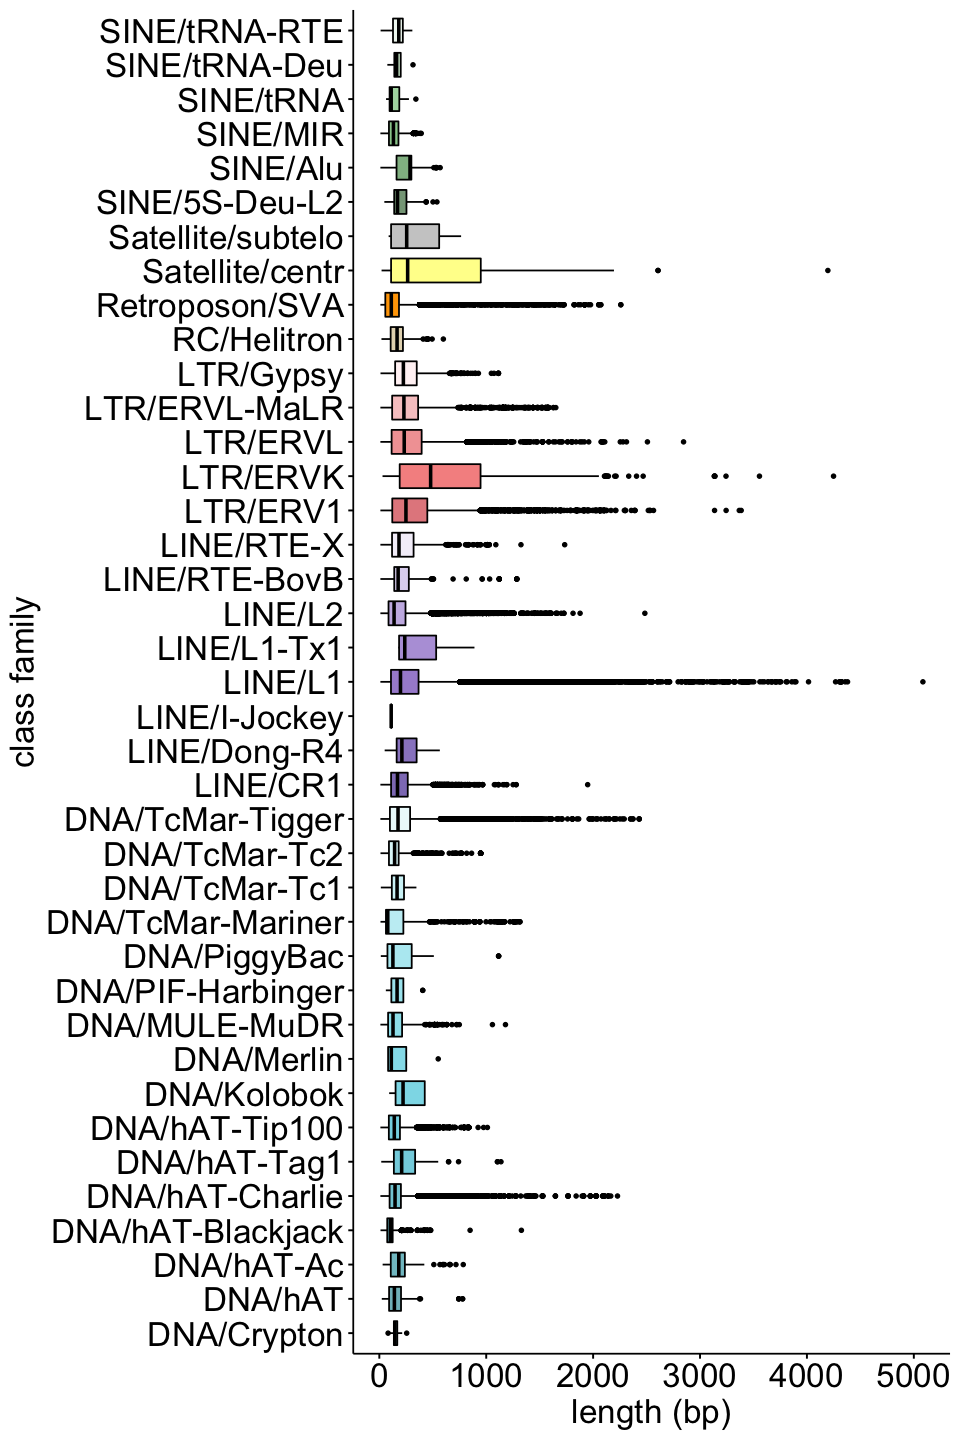

In [7]:
# The length of inserted repetitive elements according to class families
options(repr.plot.width=8, repr.plot.height=12)
g = rmout_ex2000 %>%
  dplyr::filter(grepl("/",class_family)) %>%
  dplyr::mutate(repeat_length = repeat_end-repeat_start,
                class_family = factor(class_family,levels=c(#"DNA",
                  "DNA/Crypton",
                  #"DNA/Crypton-A",
                  "DNA/hAT",
                  "DNA/hAT-Ac",
                  "DNA/hAT-Blackjack",
                  "DNA/hAT-Charlie",
                  "DNA/hAT-Tag1",
                  "DNA/hAT-Tip100",
                  #"DNA/hAT-Tip100?",
                  "DNA/Kolobok",
                  "DNA/Merlin",
                  "DNA/MULE-MuDR",
                  "DNA/PIF-Harbinger",
                  "DNA/PiggyBac",
                  "DNA/TcMar-Mariner",
                  "DNA/TcMar-Tc1",
                  "DNA/TcMar-Tc2",
                  "DNA/TcMar-Tigger",
                  "LINE/CR1",
                  "LINE/Dong-R4",
                  "LINE/I-Jockey",
                  "LINE/L1",
                  "LINE/L1-Tx1",
                  "LINE/L2",
                  "LINE/RTE-BovB",
                  "LINE/RTE-X",
                  "LTR",
                  "LTR/ERV1",
                  "LTR/ERVK",
                  "LTR/ERVL",
                  "LTR/ERVL-MaLR",
                  "LTR/Gypsy",
                  "no_repeat",
                  "others",
                  "RC/Helitron",
                  "Retroposon/SVA",
                  "rRNA",
                  "Satellite",
                  "Satellite/centr",
                  "Satellite/subtelo",
                  "scRNA",
                  "SINE/5S-Deu-L2",
                  "SINE/Alu",
                  "SINE/MIR",
                  "SINE/tRNA",
                  "SINE/tRNA-Deu",
                  "SINE/tRNA-RTE",
                  "snRNA",
                  "srpRNA",
                  "tRNA",
                  "Unknown"
                )),
                region = case_when(
                  repeat_start < 0 ~ "upstream",
                  repeat_start > ref_length ~ "downstream",
                  repeat_start > 0 & repeat_start < ref_length ~ "transcript",
                ),
                region = factor(region,levels=c("downstream","transcript","upstream"))) %>%
  na.omit() %>%
  ggboxplot(.,
            x = "class_family",
            y = "repeat_length",
            # shape = "region",
            fill = "class_family",
            outlier.shape = 20,
            rotate = T) +
  scale_fill_manual(values=c(# "DNA"="#005F6499",
    "DNA/Crypton"="#00747D99",
    "DNA/Crypton-A"="#00838E99",
    "DNA/hAT"="#008D9B99",
    "DNA/hAT-Ac"="#0097A699",
    "DNA/hAT-Blackjack"="#00A1B399",
    "DNA/hAT-Charlie"="#00ACC099",
    "DNA/hAT-Tag1"="#00B4CC99",
    "DNA/hAT-Tip100"="#00BBD399",
    "DNA/hAT-Tip100?"="#13C1D799",
    "DNA/Kolobok"="#26C5D999",
    "DNA/Merlin"="#37CADD99",
    "DNA/MULE-MuDR"="#4CD0E099",
    "DNA/PIF-Harbinger"="#65D6E599",
    "DNA/PiggyBac"="#7FDEEA99",
    "DNA/TcMar-Mariner"="#99E4EE99",
    "DNA/TcMar-Tc1"="#B2EBF299",
    "DNA/TcMar-Tc2"="#C9F1F599",
    "DNA/TcMar-Tigger"="#DFF7F999",
    "LINE/CR1"="#311A9299",
    "LINE/Dong-R4"="#4828A299",
    "LINE/I-Jockey"="#5832AD99",
    "LINE/L1"="#6437B599",
    "LINE/L1-Tx1"="#815BC399",
    "LINE/L2"="#A185D299",
    "LINE/RTE-BovB"="#C8B9E599",
    "LINE/RTE-X"="#ECE6F699",
    # "LTR"="#B71B1B99",
    "LTR/ERV1"="#D02D2D99",
    "LTR/ERVK"="#EF3E3399",
    "LTR/ERVL"="#E95E5D99",
    "LTR/ERVL-MaLR"="#F2A3A499",
    "LTR/Gypsy"="#FFEBED99",
    # "no_repeat"="grey",
    "others"="black",
    "RC/Helitron"="#E5D8BD",
    "Retroposon/SVA"="orange",
    # "rRNA"="#FDDAEC",
    # "Satellite"="#FDCDAC",
    "Satellite/centr"="#FFFF99",
    "Satellite/subtelo"="#CCCCCC",
    # "scRNA"="#666666",
    "SINE/5S-Deu-L2"="#1A5E1F99",
    "SINE/Alu"="#358A3999",
    "SINE/MIR"="#46A94B99",
    "SINE/tRNA"="#70BF7499",
    "SINE/tRNA-Deu"="#ACD9AE99",
    "SINE/tRNA-RTE"="#E7F4E999"
    # "snRNA"="#FF7F00",
    # "srpRNA"="#FBB4AE",
    # "tRNA"="#FED9A6",
    # "Unknown"="#E6AB02"
  ))  +
  # stat_compare_means(aes(group = region),  label = "p.signif") +
  ylab("length (bp)") +
  xlab("class family") +
  theme(strip.text.x=element_text(size=20, color="black", face="bold"),
        strip.text.y=element_text(size=20, color="black", face="bold"),
        panel.grid=element_blank(),
        legend.position = "none",
        plot.title = element_text(size=20),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size =20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))
g
pdf("./Figure3a.pdf", width=8, height=12)
g
dev.off()

pdf 
  2

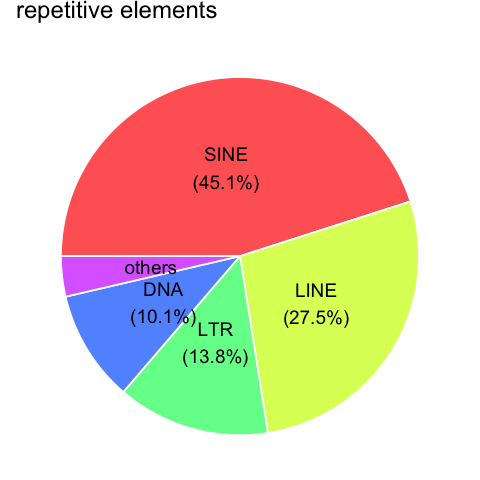

In [8]:
# the proportion of repetitive elements by total inserted length
options(repr.plot.width=4, repr.plot.height=4)
g = rmout %>%
  dplyr::rename(chrom = seqnames) %>%
  dplyr::mutate(class_family = stringr::str_split(class_family,pattern="/",simplify=TRUE) %>% .[,1]) %>%
  dplyr::group_by(class_family) %>%
  valr::bed_merge() %>%
  as.data.frame() %>%
  dplyr::mutate(repeat_length = abs(start-end)) %>%
  dplyr::group_by(class_family) %>%
  dplyr::summarize(repeat_length = sum(repeat_length)) %>%
  as.data.frame() %>%
  dplyr::mutate(proportion = 100*repeat_length/sum(repeat_length),
                class_family = ifelse(proportion<5, "others",class_family)) %>%
  as.data.frame() %>%
  ggPieDonut(., 
             mapping = aes(pies=class_family, count=repeat_length), 
             title = "repetitive elements",
             labelposition = 1,
             showRatioPie = TRUE,
             showRatioDonut = FALSE,
             interactive = FALSE)
g
pdf("./Figure3b.pdf", width=4, height=4)
g
dev.off()

pdf 
  2

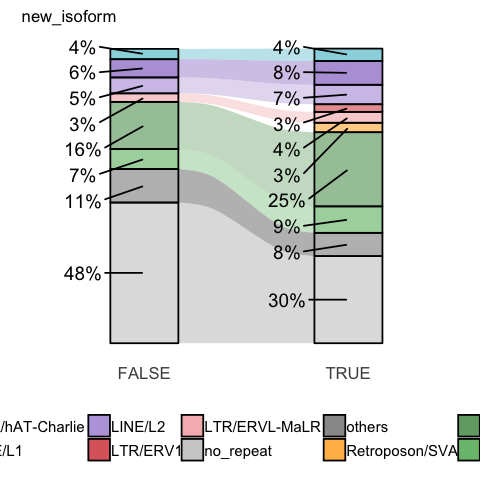

In [9]:
options(repr.plot.width=4, repr.plot.height=4)

variable="class_family"
classes = isoform_Info %>%
  as.data.frame() %>%
  .[,c("isoform","new_isoform")] %>%
  dplyr::left_join(.,
                   class_fm %>% 
                     as.data.frame() %>% 
                     .[,c("query","class_family")] %>% 
                     dplyr::rename(isoform = query),
                   by="isoform") %>%
  dplyr::mutate(evaluated = eval(parse(text = variable)),
                strata = new_isoform) %>%
  dplyr::group_by(strata, evaluated ) %>%
  dplyr::summarise(count = n()) %>%
  dplyr::group_by(strata) %>%
  dplyr::mutate(pro = (count / sum(count))) %>%
  dplyr::mutate(evaluated = ifelse(is.na(evaluated), "no_repeat", ifelse(pro >=0.025, evaluated, "others")),
                strata = factor(strata)) %>%
  dplyr::select(-count) %>%
  dplyr::group_by(strata,evaluated) %>%
  dplyr::mutate(pro = (sum(pro))) %>%
  unique() %>%
  dplyr::ungroup() %>%
  dplyr::mutate(pro = as.numeric(format(pro*100, digit=2)),
                pro_label = as.numeric(format(pro, digit=1)),
                label = paste0(pro_label,"%")) %>%
  as.data.frame() %>%
  .[,"evaluated"] %>% unique() %>% sort() %>%
  colors[.]
g = ggplot(isoform_Info %>%
             as.data.frame() %>%
             .[,c("isoform","new_isoform")] %>%
             dplyr::left_join(.,
                              class_fm %>% 
                                as.data.frame() %>% 
                                .[,c("query","class_family")] %>% 
                                dplyr::rename(isoform = query),
                              by="isoform") %>%
             dplyr::mutate(evaluated = eval(parse(text = variable)),
                           strata = new_isoform) %>%
             dplyr::group_by(strata, evaluated ) %>%
             dplyr::summarise(count = n()) %>%
             dplyr::group_by(strata) %>%
             dplyr::mutate(pro = (count / sum(count))) %>%
             dplyr::mutate(evaluated = ifelse(is.na(evaluated), "no_repeat", ifelse(pro >=0.025, evaluated, "others")),
                           strata = factor(strata),
                           evaluated = factor(evaluated,levels=c(#"DNA",
                              "DNA/Crypton",
                              #"DNA/Crypton-A",
                              "DNA/hAT",
                              "DNA/hAT-Ac",
                              "DNA/hAT-Blackjack",
                              "DNA/hAT-Charlie",
                              "DNA/hAT-Tag1",
                              "DNA/hAT-Tip100",
                              #"DNA/hAT-Tip100?",
                              "DNA/Kolobok",
                              "DNA/Merlin",
                              "DNA/MULE-MuDR",
                              "DNA/PIF-Harbinger",
                              "DNA/PiggyBac",
                              "DNA/TcMar-Mariner",
                              "DNA/TcMar-Tc1",
                              "DNA/TcMar-Tc2",
                              "DNA/TcMar-Tigger",
                              "LINE/CR1",
                              "LINE/Dong-R4",
                              "LINE/I-Jockey",
                              "LINE/L1",
                              "LINE/L1-Tx1",
                              "LINE/L2",
                              "LINE/RTE-BovB",
                              "LINE/RTE-X",
                              "LTR",
                              "LTR/ERV1",
                              "LTR/ERVK",
                              "LTR/ERVL",
                              "LTR/ERVL-MaLR",
                              "LTR/Gypsy",
                              "RC/Helitron",
                              "Retroposon/SVA",
                              "rRNA",
                              "Satellite",
                              "Satellite/centr",
                              "Satellite/subtelo",
                              "scRNA",
                              "SINE/5S-Deu-L2",
                              "SINE/Alu",
                              "SINE/MIR",
                              "SINE/tRNA",
                              "SINE/tRNA-Deu",
                              "SINE/tRNA-RTE",
                              "snRNA",
                              "srpRNA",
                              "tRNA",
                              "Unknown",
                              "others",
                              "no_repeat"
                            ))) %>%
             dplyr::select(-count) %>%
             dplyr::group_by(strata,evaluated) %>%
             dplyr::mutate(pro = (sum(pro))) %>%
             unique() %>%
             dplyr::ungroup() %>%
             dplyr::mutate(pro = as.numeric(format(pro*100, digit=2)),
                           pro_label = as.numeric(format(pro, digit=1)),
                           label = paste0(pro_label,"%")),
           aes(x = strata, stratum = evaluated, alluvium = evaluated,
               y = pro,
               fill = evaluated, label = label)) +
  geom_flow() +
  geom_stratum(alpha = .5) +
  ggrepel::geom_text_repel(
    stat = "stratum", 
    size = 4, 
    direction = "y", 
    nudge_x = -.3
  ) +
  # geom_text(stat = "stratum", size = 3) +
  scale_fill_manual(values = classes) +
  ggtitle("new_isoform") +
  ylab(paste0("proportion")) +
  theme_minimal() +
  # coord_flip() +
  theme(strip.text.x=element_text(size=9, color="black", face="bold"),
        strip.text.y=element_text(size=9, color="black", face="bold"),
        panel.grid=element_blank(),
        legend.position = "bottom",
        plot.title = element_text(size=10),
        axis.title.x = element_text(size=0),
        axis.title.y = element_text(size =0),
        axis.text.y = element_text(size = 0),
        axis.text.x = element_text(size = 10),
        legend.text =  element_text(size = 9), 
        legend.key.size = grid::unit(1, "lines"),
        legend.title = element_text(size = 0, hjust = 0))
g
pdf("./Figure3c.pdf", width=4, height=4)
g
dev.off()

pdf 
  2

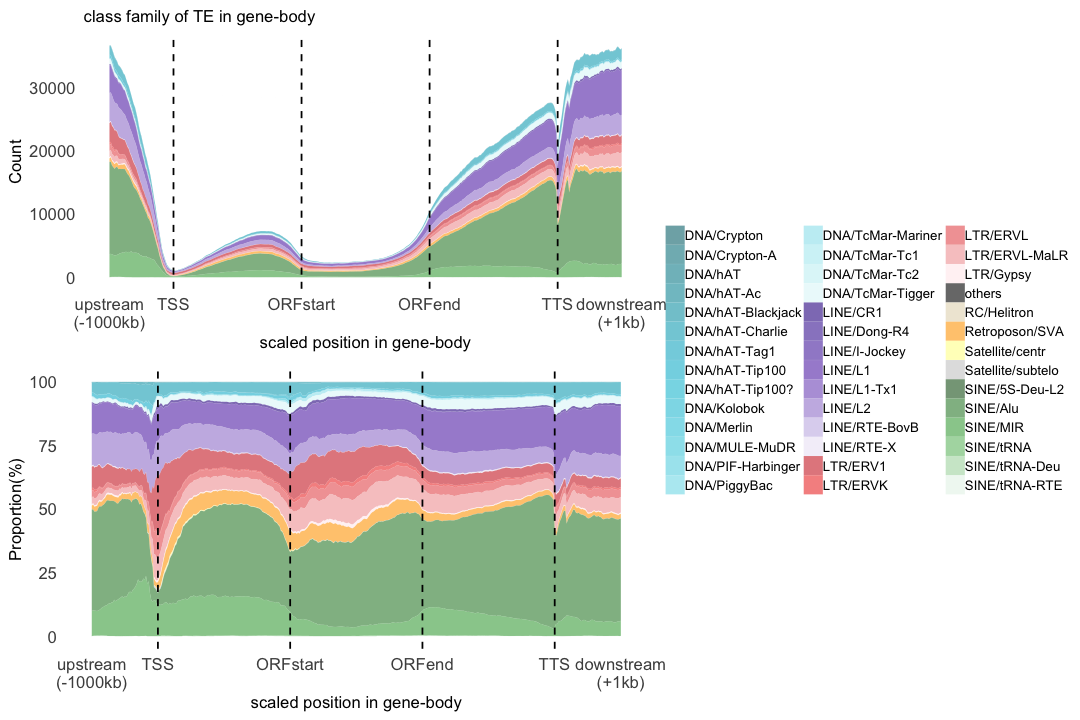

In [10]:
g1 = df %>%
    dplyr::group_by(bin) %>%
    #dplyr::mutate(proportion = 100*count/sum(count)) %>%
    #dplyr::filter(proportion>2) %>%
    dplyr::filter(grepl("/",repeat_name)) %>%
    dplyr::mutate(proportion = 100*count/sum(count)) %>%
    #dplyr::mutate(repeat_name = ifelse(proportion < 2, "others", repeat_name)) %>%
    dplyr::ungroup() %>%
    ggplot(., aes(x=bin, y=count, fill=repeat_name)) + 
    geom_area(alpha=0.6 , size=0.01, colour="white") +
    scale_fill_manual(values=c(# "DNA"="#005F6499",
      "DNA/Crypton"="#00747D99",
      "DNA/Crypton-A"="#00838E99",
      "DNA/hAT"="#008D9B99",
      "DNA/hAT-Ac"="#0097A699",
      "DNA/hAT-Blackjack"="#00A1B399",
      "DNA/hAT-Charlie"="#00ACC099",
      "DNA/hAT-Tag1"="#00B4CC99",
      "DNA/hAT-Tip100"="#00BBD399",
      "DNA/hAT-Tip100?"="#13C1D799",
      "DNA/Kolobok"="#26C5D999",
      "DNA/Merlin"="#37CADD99",
      "DNA/MULE-MuDR"="#4CD0E099",
      "DNA/PIF-Harbinger"="#65D6E599",
      "DNA/PiggyBac"="#7FDEEA99",
      "DNA/TcMar-Mariner"="#99E4EE99",
      "DNA/TcMar-Tc1"="#B2EBF299",
      "DNA/TcMar-Tc2"="#C9F1F599",
      "DNA/TcMar-Tigger"="#DFF7F999",
      "LINE/CR1"="#311A9299",
      "LINE/Dong-R4"="#4828A299",
      "LINE/I-Jockey"="#5832AD99",
      "LINE/L1"="#6437B599",
      "LINE/L1-Tx1"="#815BC399",
      "LINE/L2"="#A185D299",
      "LINE/RTE-BovB"="#C8B9E599",
      "LINE/RTE-X"="#ECE6F699",
      # "LTR"="#B71B1B99",
      "LTR/ERV1"="#D02D2D99",
      "LTR/ERVK"="#EF3E3399",
      "LTR/ERVL"="#E95E5D99",
      "LTR/ERVL-MaLR"="#F2A3A499",
      "LTR/Gypsy"="#FFEBED99",
      # "no_repeat"="grey",
      "others"="black",
      "RC/Helitron"="#E5D8BD",
      "Retroposon/SVA"="orange",
      # "rRNA"="#FDDAEC",
      # "Satellite"="#FDCDAC",
      "Satellite/centr"="#FFFF99",
      "Satellite/subtelo"="#CCCCCC",
      # "scRNA"="#666666",
      "SINE/5S-Deu-L2"="#1A5E1F99",
      "SINE/Alu"="#358A3999",
      "SINE/MIR"="#46A94B99",
      "SINE/tRNA"="#70BF7499",
      "SINE/tRNA-Deu"="#ACD9AE99",
      "SINE/tRNA-RTE"="#E7F4E999"
      # "snRNA"="#FF7F00",
      # "srpRNA"="#FBB4AE",
      # "tRNA"="#FED9A6",
      # "Unknown"="#E6AB02"
    )) +
    ggtitle(paste0("class family of TE in gene-body")) +
    ylab(paste0("Count")) +
    xlab("scaled position in gene-body") +
    scale_x_continuous(labels=c("upstream\n(-1000kb)","TSS","ORFstart","ORFend","TTS","downstream\n(+1kb)"), breaks=c(-50,0,100,200,300,350), limits=c(-50,350)) +
    geom_vline(xintercept = 0,linetype="dashed",colour="black") +
    geom_vline(xintercept = 100,linetype="dashed",colour="black") +
    geom_vline(xintercept = 200,linetype="dashed",colour="black") +
    geom_vline(xintercept = 300,linetype="dashed",colour="black") +
    theme_minimal() +
    theme(strip.text.x=element_text(size=9, color="black", face="bold"),
          strip.text.y=element_text(size=9, color="black", face="bold"),
          panel.grid=element_blank(),
          legend.position = "right",
          plot.title = element_text(size=10),
          axis.title.x = element_text(size=10),
          axis.title.y = element_text(size =10),
          axis.text.y = element_text(size = 10),
          axis.text.x = element_text(size = 10),
          legend.text =  element_text(size = 8), 
          legend.key.size = grid::unit(0.8, "lines"),
          legend.title = element_text(size = 0, hjust = 0))
  
g2 = df %>%
    dplyr::group_by(bin) %>%
    #dplyr::mutate(proportion = 100*count/sum(count)) %>%
    #dplyr::filter(proportion>2) %>%
    dplyr::filter(grepl("/",repeat_name)) %>%
    dplyr::mutate(proportion = 100*count/sum(count)) %>%
    #dplyr::mutate(repeat_name = ifelse(proportion < 2, "others", repeat_name)) %>%
    dplyr::ungroup() %>%
    ggplot(., aes(x=bin, y=proportion, fill=repeat_name)) + 
    geom_area(alpha=0.6 , size=0.01, colour="white") +
    scale_fill_manual(values=c(# "DNA"="#005F6499",
      "DNA/Crypton"="#00747D99",
      "DNA/Crypton-A"="#00838E99",
      "DNA/hAT"="#008D9B99",
      "DNA/hAT-Ac"="#0097A699",
      "DNA/hAT-Blackjack"="#00A1B399",
      "DNA/hAT-Charlie"="#00ACC099",
      "DNA/hAT-Tag1"="#00B4CC99",
      "DNA/hAT-Tip100"="#00BBD399",
      "DNA/hAT-Tip100?"="#13C1D799",
      "DNA/Kolobok"="#26C5D999",
      "DNA/Merlin"="#37CADD99",
      "DNA/MULE-MuDR"="#4CD0E099",
      "DNA/PIF-Harbinger"="#65D6E599",
      "DNA/PiggyBac"="#7FDEEA99",
      "DNA/TcMar-Mariner"="#99E4EE99",
      "DNA/TcMar-Tc1"="#B2EBF299",
      "DNA/TcMar-Tc2"="#C9F1F599",
      "DNA/TcMar-Tigger"="#DFF7F999",
      "LINE/CR1"="#311A9299",
      "LINE/Dong-R4"="#4828A299",
      "LINE/I-Jockey"="#5832AD99",
      "LINE/L1"="#6437B599",
      "LINE/L1-Tx1"="#815BC399",
      "LINE/L2"="#A185D299",
      "LINE/RTE-BovB"="#C8B9E599",
      "LINE/RTE-X"="#ECE6F699",
      # "LTR"="#B71B1B99",
      "LTR/ERV1"="#D02D2D99",
      "LTR/ERVK"="#EF3E3399",
      "LTR/ERVL"="#E95E5D99",
      "LTR/ERVL-MaLR"="#F2A3A499",
      "LTR/Gypsy"="#FFEBED99",
      # "no_repeat"="grey",
      "others"="black",
      "RC/Helitron"="#E5D8BD",
      "Retroposon/SVA"="orange",
      # "rRNA"="#FDDAEC",
      # "Satellite"="#FDCDAC",
      "Satellite/centr"="#FFFF99",
      "Satellite/subtelo"="#CCCCCC",
      # "scRNA"="#666666",
      "SINE/5S-Deu-L2"="#1A5E1F99",
      "SINE/Alu"="#358A3999",
      "SINE/MIR"="#46A94B99",
      "SINE/tRNA"="#70BF7499",
      "SINE/tRNA-Deu"="#ACD9AE99",
      "SINE/tRNA-RTE"="#E7F4E999"
      # "snRNA"="#FF7F00",
      # "srpRNA"="#FBB4AE",
      # "tRNA"="#FED9A6",
      # "Unknown"="#E6AB02"
    )) +
    #ggtitle("class family of TE in gene-body") +
    ylab(paste0("Proportion(%)")) +
    xlab("scaled position in gene-body") +
    scale_x_continuous(labels=c("upstream\n(-1000kb)","TSS","ORFstart","ORFend","TTS","downstream\n(+1kb)"), breaks=c(-50,0,100,200,300,350), limits=c(-50,350)) +
    geom_vline(xintercept = 0,linetype="dashed",colour="black") +
    geom_vline(xintercept = 100,linetype="dashed",colour="black") +
    geom_vline(xintercept = 200,linetype="dashed",colour="black") +
    geom_vline(xintercept = 300,linetype="dashed",colour="black") +
    theme_minimal() +
    theme(strip.text.x=element_text(size=9, color="black", face="bold"),
          strip.text.y=element_text(size=9, color="black", face="bold"),
          panel.grid=element_blank(),
          legend.position = "right",
          plot.title = element_text(size=10),
          axis.title.x = element_text(size=10),
          axis.title.y = element_text(size =10),
          axis.text.y = element_text(size = 10),
          axis.text.x = element_text(size = 10),
          legend.text =  element_text(size = 8), 
          legend.key.size = grid::unit(0.8, "lines"),
          legend.title = element_text(size = 0, hjust = 0))

options(repr.plot.width=9, repr.plot.height=6)
ggpubr::ggarrange(g1,g2,ncol=1,common.legend = TRUE, legend = "right")

pdf("./Figure3d.pdf", width=9, height=6)
ggpubr::ggarrange(g1,g2,ncol=1,common.legend = TRUE, legend = "right")
dev.off()

pdf 
  2

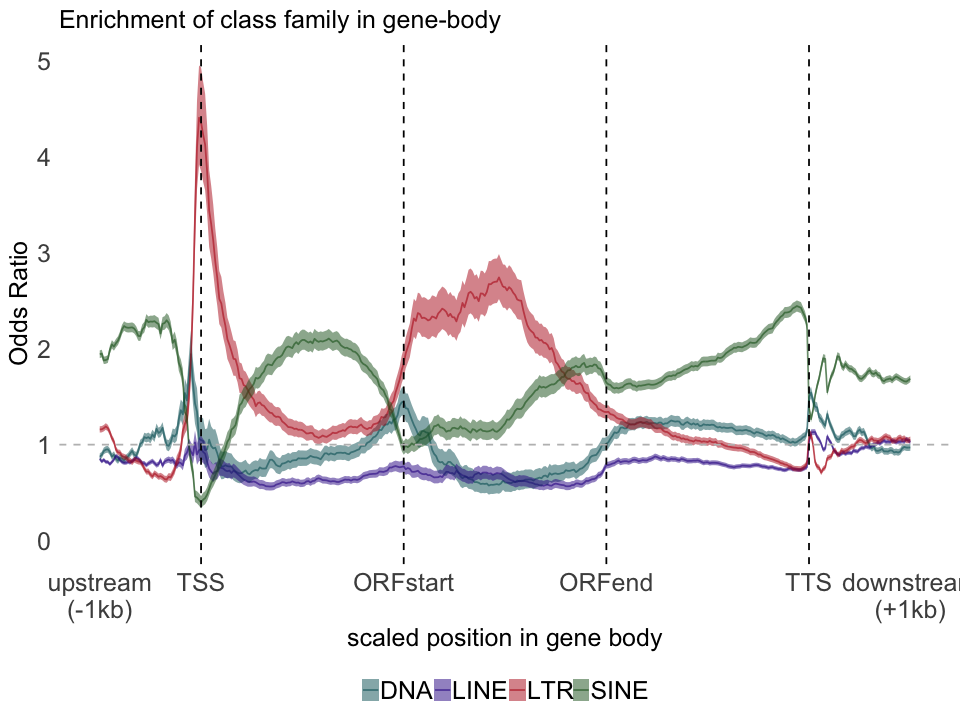

In [11]:
# Enrichment of class families in gene-body
options(repr.plot.width=8, repr.plot.height=6)
g = odds_df %>%
  dplyr::filter(class_family %in% c("DNA","SINE","LINE","LTR")) %>%
  ggplot(., aes(x = bin, y = odds, group = class_family, fill = class_family)) + 
  geom_line(aes(color = class_family)) +
  # geom_smooth(method="loess", se=FALSE) +
  geom_ribbon(aes(x=bin, y=odds, ymax = CI_up, ymin = CI_low, fill = class_family), 
              alpha=0.5) +
  scale_color_manual(values=c(
    "DNA"="#005F6499",
    "LINE"="#311A9299",
    "LTR"="#B71B1B99",
    # "Retroposon"="orange",
    # "rRNA"="pink",
    # "Satellite"="#FDCDAC",
    # "scRNA"="#666666",
    "SINE"="#1A5E1F99"
    # "snRNA"="#FF7F00",
    # "srpRNA"="#FBB4AE",
    # "tRNA"="#FED9A6"
  )) +
  scale_fill_manual(values=c(
    "DNA"="#005F6499",
    "LINE"="#311A9299",
    "LTR"="#B71B1B99",
    # "Retroposon"="orange",
    # "rRNA"="pink",
    # "Satellite"="#FDCDAC",
    # "scRNA"="#666666",
    "SINE"="#1A5E1F99"
    # "snRNA"="#FF7F00",
    # "srpRNA"="#FBB4AE",
    # "tRNA"="#FED9A6"
  )) +
  ggtitle("Enrichment of class family in gene-body") +
  ylab(paste0("Odds Ratio")) +
  xlab("scaled position in gene body") +
  scale_x_continuous(labels=c("upstream\n(-1kb)","TSS","ORFstart","ORFend","TTS","downstream\n(+1kb)"), breaks=c(-50,0,100,200,300,350), limits=c(-50,350)) +
  geom_vline(xintercept = 0,linetype="dashed",colour="black") +
  geom_vline(xintercept = 100,linetype="dashed",colour="black") +
  geom_vline(xintercept = 200,linetype="dashed",colour="black") +
  geom_vline(xintercept = 300,linetype="dashed",colour="black") +
  geom_hline(yintercept = 1,linetype="dashed",colour="grey") +
  theme_minimal() +
  # facet_wrap( . ~ class_family, ncol = 2, scales = "free") +
  theme(strip.text.x=element_text(size=15, color="black", face="bold"),
        strip.text.y=element_text(size=15, color="black", face="bold"),
        panel.grid=element_blank(),
        legend.position = "bottom",
        plot.title = element_text(size=15),
        axis.title.x = element_text(size=15),
        axis.title.y = element_text(size =15),
        axis.text.y = element_text(size = 15),
        axis.text.x = element_text(size = 15),
        legend.text =  element_text(size = 15), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))
g
pdf("./Figure3e.pdf", width=8, height=6)
g
dev.off()

[1] "plotting..."


pdf 
  2

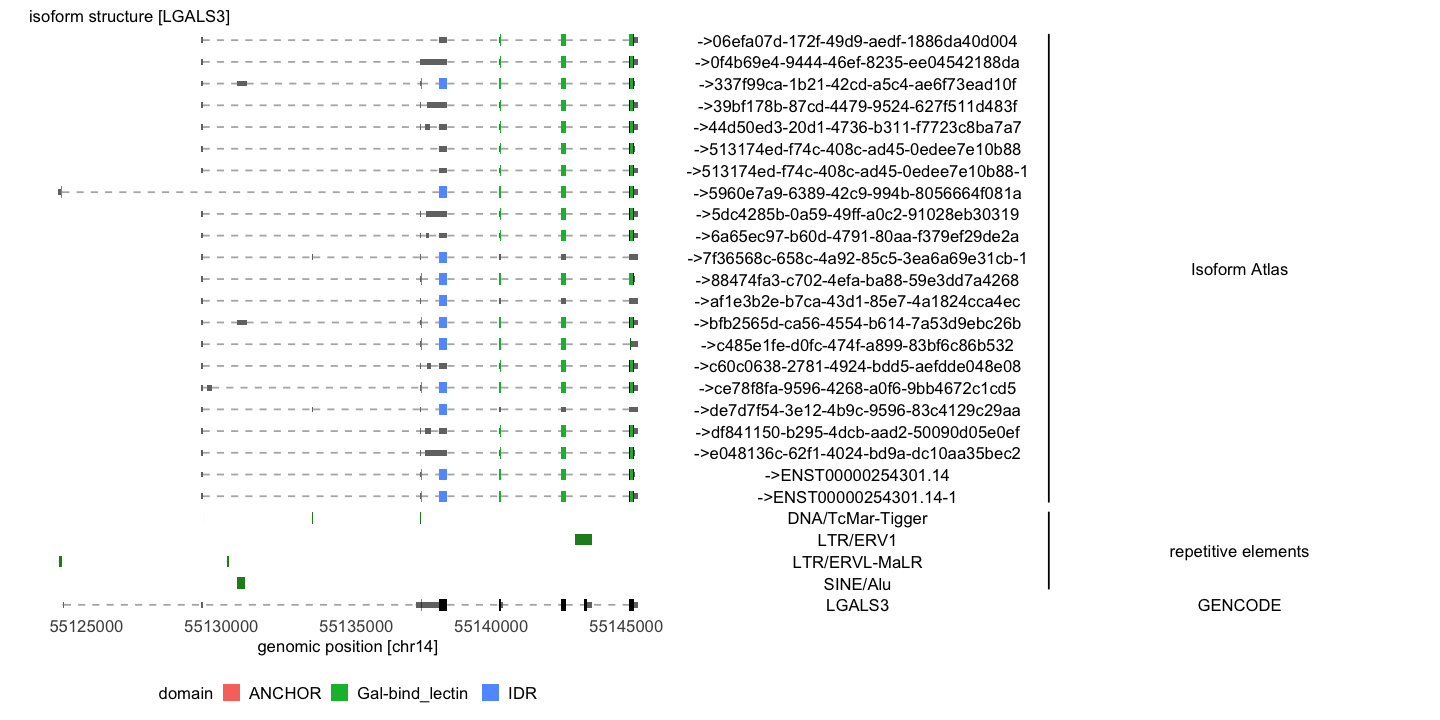

In [12]:
gene="LGALS3"

options(repr.plot.width=12, repr.plot.height=6)
g = plot_iso_structure(gene = gene, extra = 1e03, repeat_draw = TRUE, atac_draw = FALSE, rip_draw = FALSE) + theme(strip.text.y=element_text(angle = 0, size=10, color="black"))
g <- ggplotGrob(g)
for(i in which(grepl("strip-r", g$layout$name))){
  g$grobs[[i]]$layout$clip <- "off"
}
grid::grid.draw(g)

pdf("./Figure3f.pdf", width=12, height=6)
grid::grid.draw(g)
dev.off()

pdf 
  2

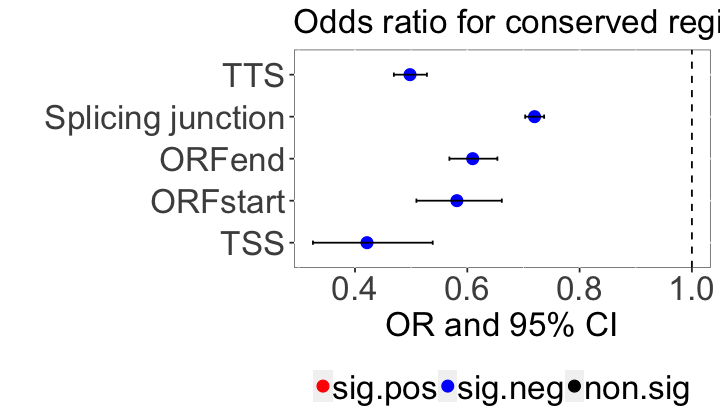

In [13]:
options(repr.plot.width=6, repr.plot.height=3.5)
g = odds_df_cons %>%
  dplyr::mutate(color = ifelse(CI_low>1, "sig.pos", ifelse(CI_up<1, "sig.neg", "non.sig")),
                region = dplyr::case_when(
                    region == "TSS" ~ "TSS",
                    region == "TTS" ~ "TTS",
                    region == "splicing_junction" ~ "Splicing junction",
                    region == "CDSstart" ~ "ORFstart",
                    region == "CDSend" ~ "ORFend"
                ),
                region = factor(region,levels=c("TSS","ORFstart","ORFend","Splicing junction","TTS"))
               ) %>%
  ggplot(., 
         aes(x=region, y=odds)) +
  geom_point(aes(color=color), size = 3) +
  scale_color_manual(values = c("sig.pos" = "red", "sig.neg" = "blue", "non.sig" = "black")) +
  coord_flip() +
  geom_hline(yintercept = 1, 
             linetype = "dashed") +
  theme(panel.background = element_rect(fill = "white", color = "grey50")) +
  labs(title = paste0("Odds ratio for conserved region [phastCons100way > 0.8: repeat-inserted VS. repeat-non-inserted]"), 
       x = "", 
       y = "OR and 95% CI") +
  geom_errorbar(aes(ymin = CI_low, ymax = CI_up), 
                width = 0.1) +
  theme(strip.text.x=element_text(size=10, color="black"),
        strip.text.y=element_text(size=10, color="black"),
        legend.position = "bottom",
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        axis.text.x = element_text(size = 20),
        legend.text =  element_text(size = 20), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))

g
pdf("./Figure3g.pdf", width=6, height=3.5)
g
dev.off()

In [14]:
odds_df_cons

region,odds,CI_low,CI_up
<chr>,<dbl>,<dbl>,<dbl>
TSS,0.4213863,0.3251059,0.5384042
CDSstart,0.5814528,0.5093275,0.6614675
splicing_junction,0.7197686,0.7030524,0.7368423
CDSend,0.6095941,0.5680713,0.6535582
TTS,0.4979536,0.4691883,0.5281152
